# Multiple/Multi-variate Linear Regression

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing Dataset
dataset = pd.read_csv('./50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Preparing the Dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

## Problem Formulation
Our hypothesis for this Multi-variate Linear Regression problem would look like:
$$
y = b_0 + b_1*x_1 + b_2*x_2 + b_3*x_3 + b_4*D_1
$$

Where,
- y = Dependent Variable
- $b_0$ = Constant
- $b_1, b_2, b_3, b_4$ = Coefficients
- $x_1, x_2, x_3$ = Independent Variables
- $D_1$ = Dummy Variable formed from converting the "State" column into two boolean columns

**Note:** We're only using one dummy variable column in this example, since there are two alternatives only. The boolean values on $D_1$ (New York = 1) will act as switch. (Considering we only have two types)

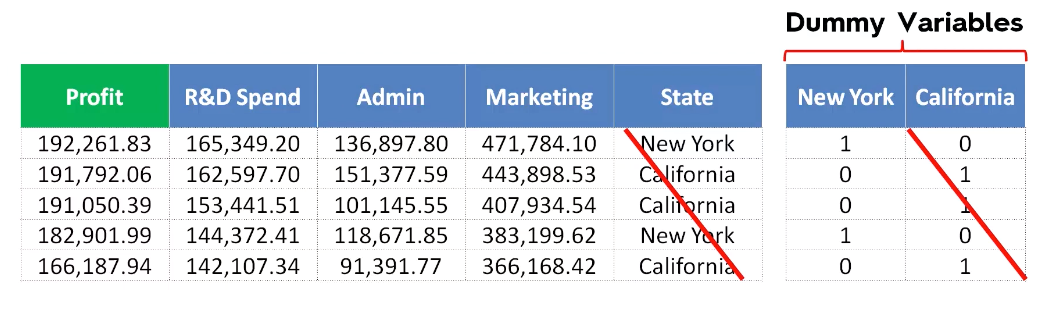

### What happens if we include the second dummy variable as well?
In this scenario, we're basically duplicating a variable. Here,
$$
D_2 = 1 - D_1
$$
The phenomenon where one or several independent variables in a Linear Regression predict another is called Multicollinearity. As a result of this effect, the model cannot distinguish between the effects of $D_1$ from the effects of $D_2$, and therefore won't work properly. This is called the **Dummy Variable Trap**.

Tips: The problem arises as the equation cannot have all these 3 variables together. Always omit one dummy variable.
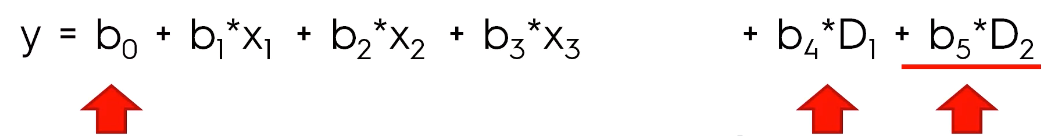

In [4]:
# Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Encoding Independent Variable
labelencoder_X = LabelEncoder()
labelencoder_X.fit_transform(X[:, 3])
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(columnTransformer.fit_transform(X), dtype=np.float)

In [5]:
# Avoiding the Dummy Variable Trap (Remove the first column)
X = X[:, 1:]

### Feature Scaling
There's no need to do feature scaling for multiple linear regression, the library takes care of it

In [6]:
# Splitting the Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### What is the p-value?
The p-value is the probability that, if the null hypothesis were true, sampling variation would produce an estimate that is further away from the hypothesised value than our data estimate. In less formal terms, *the p-value tells us how litely it is to get a result like this if the null hypothesis is true*.

Let's take an example of a chocolate bar which contains an average of 70g peanuts in 200g packs. The customers complain of experiencing less peanuts than actually claimed. In this scenario, we'll have:  
$H_0$ = (Null Hypothesis) - The mean or average weight of peanuts in a packet is 70 grams  
$H_1$ = (Alternate Hypothesis) - The mean or average weight of peanuts in a packet is less than 70 grams  
$\alpha$ = (Significance Level) - 0.05 (If the p-value is lower than $\alpha$, the null hypothesis should be rejected)

Let's assume that 20 packets are tested for the weights of peanuts in them and the mean is found out to be 68.7g. The p-value for this data, comparing with the mean of 70g is 0.18. Judging from this data, the probability of getting a mean of 68.7 or less from a sample of this size (and variation) is 0.18 or 18%, if the mean weight of peanuts in the population is 70g or more.

Note:
- The smaller the p-value is, the more evidence we have that the null hypothesis is probably wrong
- If the p-value is large, then our original idea is probably correct - we do not reject the null hypothesis. This is called a **non-significant result**.
- The p-value is NOT the probability the claim is true
- The p-value is NOT the probability the null hypothesis is true
- A little more detail: A small p-value indicates that by pure luck alone, it would be unlikely to get a sample like the one we have if the null hypothesis is true. If this is small enough we start thinking that maybe we aren’t super lucky and instead our assumption about the null being true is wrong. Thats why we reject with a small p-value.
- A large p-value indicates that it would be pretty normal to get a sample like ours if the null hypothesis is true. So you can see, there is no reason here to change our minds like we did with a small p-value.

In a nutshell, the p-value is actually the probability of getting a sample like ours, or more extreme than ours IF the null hypothesis is true. So, we assume the null hypothesis is true and then determine how “strange” our sample really is. If it is not that strange (a large p-value) then we don’t change our mind about the null hypothesis. As the p-value gets smaller, we start wondering if the null really is true and well maybe we should change our minds (and reject the null hypothesis).

How to calculate p-value: https://www.wikihow.com/Calculate-P-Value

## How to build a model?

#### Method-1: All In
Throw in all your variables when:
- You have prior knowledge
- You have to - company framework, etc.
- Preparing for Backward Elimination

#### Method-2: Backward Elimination
1. Select a significance level to stay in the model (for example, SL=0.05)
2. Fit the full model with all possible predictors
3. Consider the predictor of the highest P-value. If P>SL, go to (4), otherwise go to (7)
4. Remove the predictor
5. Fit model without this variable (rebuild/re-fit)
6. Go to (3)
7. Model is ready

#### Method-3: Forward Selection
1. Select a significance level to enter the model (for example, SL=0.05)
2. Fit all simple regression models $y \text{ ~ } x_n$. Select the one with the lowest P-value
3. Keep this variable and fit all possible models with  one extra predictor added to the one(s) you already have
4. Consider the predictor with  lowest P-value. If P<SL, go to (3), otherwise go to (5)
5. Keep the previous model

#### Method-4: Bi-directional Elimination
1. Select significance levels to enter and stay in the model (for example, SLENTER=0.05, SLSTAY=0.05)
2. Perform the next step of Forward Selection (new variables must have P<SLENTER to enter)
3. Perform all steps of Backward Elimination (old variables must have P<SLSTAY to stay)
4. No new variables can enter and no old variables can exit - model is ready

#### Method-5: All Possible Models
1. Select a criterion of goodness of fit (for example, Akaike criterion)
2. Construct all possible regression models ($2^N-1$ total combinations - 10 columns means 1023 models)
3. Select the one with best criterion - model is ready

In [7]:
# Fitting Multiple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Predicting the Test Set Results
y_pred = regressor.predict(X_test)

## Backward Elimination

In [9]:
# Building the Optimal Modal using Backward Elimination
import statsmodels.api as sm

In [10]:
# Statsmodel doesn't account for b0 variable (constant) - Add an extra column of 1's to the begining of X
X = np.append(arr=np.ones((50, 1)).astype(int), values=X, axis = 1)

##### Step-2: Fit the full model with all possible predictors

In [11]:
# Creating Optimal Matrix of Features
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()

In [12]:
# Checking Summary
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           1.34e-27
Time:                        19:11:59   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Step-3: Consider the predictor of the highest P-value. If P>SL, go to (4), otherwise go to (7)
From the above summary, it seems that x2 has the highest P-value and is higher than 5%. We need to **remove x2**.

##### Step-4: Remove the predictor

In [13]:
# Creating Optimal Matrix of Features
X_opt = X[:, [0, 1, 3, 4, 5]]

##### Step-5: Fit model without this variable (rebuild/re-fit)

In [14]:
# Re-fit Model
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()

In [15]:
# Checking Summary
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           8.49e-29
Time:                        19:12:00   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Step-3: Consider the predictor of the highest P-value. If P>SL, go to (4), otherwise go to (7)
From the above summary, it seems that x1 has the highest P-value and is higher than 5%. We need to **remove x1**.

##### Step-4: Remove the predictor

In [16]:
# Creating Optimal Matrix of Features
X_opt = X[:, [0, 3, 4, 5]]

##### Step-5: Fit model without this variable (rebuild/re-fit)

In [17]:
# Re-fit Model
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()

In [18]:
# Checking Summary
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           4.53e-30
Time:                        19:12:00   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Step-3: Consider the predictor of the highest P-value. If P>SL, go to (4), otherwise go to (7)
From the above summary, it seems that x2 has the highest P-value and is higher than 5%. We need to **remove x2**.

##### Step-4: Remove the predictor

In [19]:
# Creating Optimal Matrix of Features
X_opt = X[:, [0, 3, 5]]

##### Step-5: Fit model without this variable (rebuild/re-fit)

In [20]:
# Re-fit Model
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()

In [21]:
# Checking Summary
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           2.16e-31
Time:                        19:12:01   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Step-3: Consider the predictor of the highest P-value. If P>SL, go to (4), otherwise go to (7)
From the above summary, it seems that x2 has the highest P-value and is higher than 5%. We need to **remove x2**.

##### Step-4: Remove the predictor

In [22]:
# Creating Optimal Matrix of Features
X_opt = X[:, [0, 3]]

##### Step-5: Fit model without this variable (rebuild/re-fit)

In [23]:
# Re-fit Model
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()

In [24]:
# Checking Summary
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           3.50e-32
Time:                        19:12:02   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Step-7: Model is ready
If we strictly follow backward elimination, we have finished and we can conclusively say that R&D spend (x1 here - remaining column) is the most important feature which influences the profit.

### Automated Backward Elimination

#### With P-values only

In [25]:
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    print(regressor_OLS.summary())
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           3.50e-32
Time:                        19:12:02   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

#### With p-values and Adjusted R Squared

In [26]:
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    print(regressor_OLS.summary())
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           2.16e-31
Time:                        19:12:02   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0